<img align=left src="CRIkit_Logo.png"> 
<br>
<br>
<br>
<br>
<br>
#####Coherent Raman Imaging toolKit

# A Quick and Simple Demonstration


###Setup

In [1]:
# Setup our imports
import sys
import time
import numpy as np
import scipy
import scipy.signal
import matplotlib.pyplot as plt

from openpyxl import Workbook
from openpyxl import load_workbook
import als_methods as als
import pre as crikit

No pyFFTW found. Using Scipy instead. 
    You may want to install pyFFTW and FFTW for [potentially]
    significant performance enhancement


In [2]:
W = load_workbook('spectra_data.xlsx')
p = W.get_sheet_by_name(name = 'Sheet1')

a=[]

for row in p.iter_rows():
    for k in row:
        a.append(k.internal_value)


/Users/fuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [3]:
data = np.resize(a, [int(len(a)/15), 15])
print("The dictionary name list is:\n", data[0,:])


The dictionary name list is:
 ['wavelength' 'background_1' 'background_2' 'background_3' 'background_4'
 'background_5' 'background_6' 'background_7' 'background_8' 'background_9'
 'signal_1' 'signal_2' 'signal_3' 'signal_4' 'signal_5']


In [4]:
def nm2wavenumber(pump, antistokes):
    return 10**7*(1/np.array(antistokes) - 1/pump)
def area(x):
    return np.sum(x)

In [5]:
## reshape the data to dictionary 
dic ={};
for i in range(15):
    dic[data[0,i]] = data[1:2001,i].astype(np.float)
dic["wavenumber"] = nm2wavenumber(1064, dic[data[0,0]])


## Normalized the data, which makes the area of each plot to unit 1;
dic_norm = {};
for i in dic:
    #print(area(dic[i]))
    dic_norm[i] = dic[i]/area(dic[i])

In [6]:
background_list = ["background_1", "background_2", "background_3", "background_4", "background_5", 
 "background_6", "background_7", "background_8", "background_9"];
signal_list = ["signal_1", "signal_2", "signal_3", "signal_4", "signal_5"];
#signal_list = ["signal_1", "signal_2", "signal_3"];

background =  0.0*dic_norm["background_1"]
for i in background_list:
    background += dic_norm[i]
background = background/len(background_list)

signal =  0.0*dic_norm["signal_1"]
for i in signal_list:
    signal += dic_norm[i]
signal = signal/len(signal_list)

print("Number of background data is:", len(background_list))
print("background is:", background)
print("Number of signal data is:", len(signal_list))
print("signal is:", signal)


Number of background data is: 9
background is: [ 0.00025714  0.00025749  0.00025835 ...,  0.00010163  0.0001021
  0.00010296]
Number of signal data is: 5
signal is: [ 0.00025703  0.00025681  0.00025956 ...,  0.00011258  0.0001133
  0.00011389]


<IPython.core.display.Javascript object>


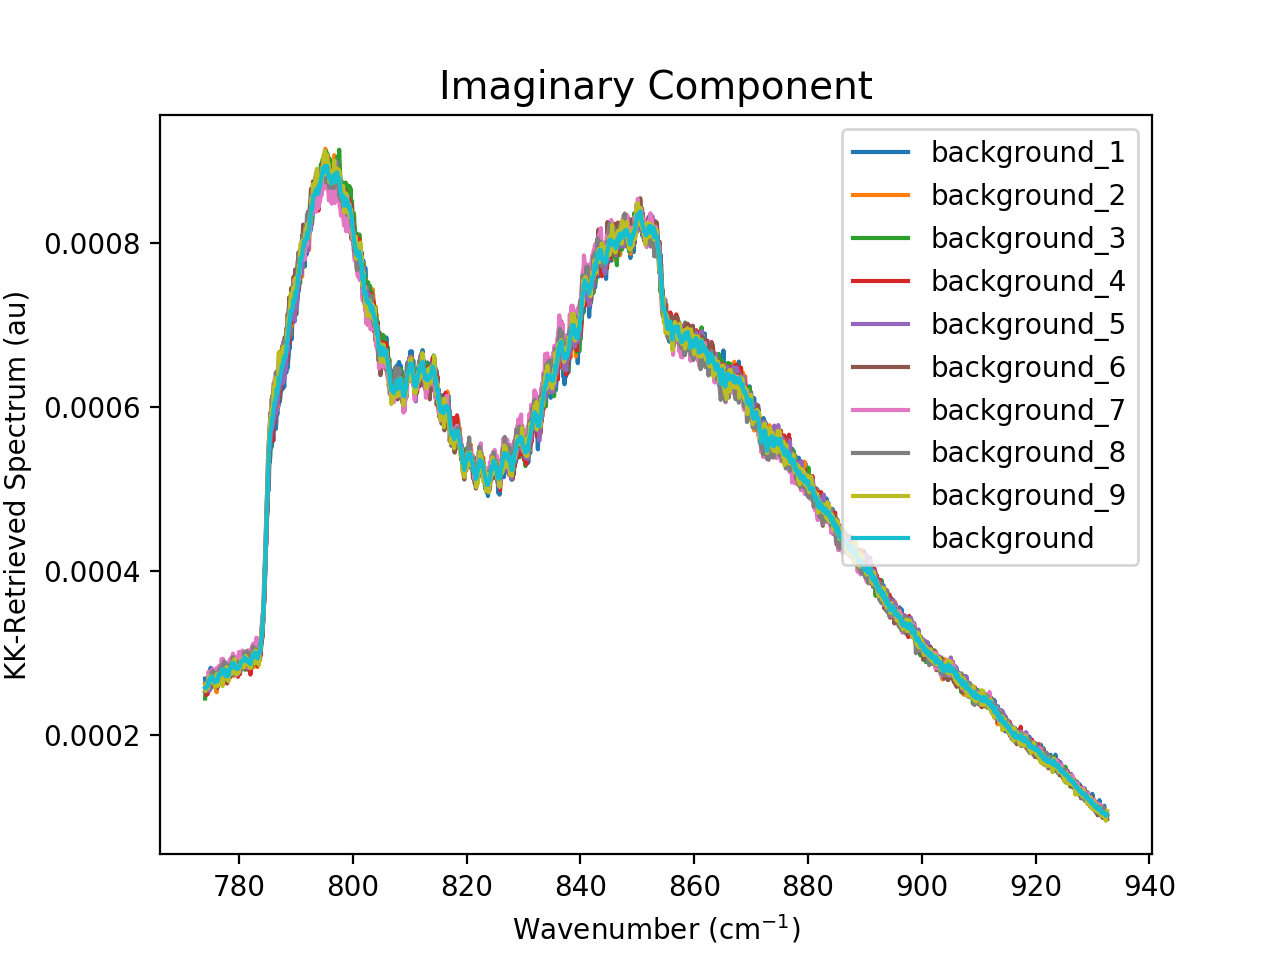

In [8]:
%matplotlib notebook

xmin = 750;
xmax = 950;

plt.figure(1)
for i in background_list:
    plt.plot(dic[data[0,0]], dic_norm[i], label = i)
    
plt.plot(dic[data[0,0]], background, label = 'background')

#for i in signal_list:
#    plt.plot(dic[data[0,0]], dic_norm[i], label = i)

#plt.plot(dic[data[0,0]], signal, label = 'signal')

#plt.xlim((xmin, xmax))

plt.legend()
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('KK-Retrieved Spectrum (au)')
plt.title('Imaginary Component', fontsize=14)
plt.show()



In [ ]:
%matplotlib notebook

xmin = 750;
xmax = 950;

plt.figure(1)
for i in background_list:
    plt.plot(dic["wavenumber"], dic_norm[i], label = i)
    
plt.plot(dic["wavenumber"], background, label = 'background')

for i in signal_list:
    plt.plot(dic["wavenumber"], dic_norm[i], label = i)

plt.plot(dic["wavenumber"], signal, label = 'signal')

#plt.xlim((xmin, xmax))

plt.legend()
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('KK-Retrieved Spectrum (au)')
plt.title('Imaginary Component', fontsize=14)
plt.show()



In [ ]:
%matplotlib notebook

xmin = 750;
xmax = 950;
plt.figure(figsize=[10, 4])
plt.subplot(121)
plt.plot(dic["wavenumber"], background, label = 'background')
plt.plot(dic["wavenumber"], signal, label = 'signal')
plt.plot(dic["wavenumber"], signal - background, label = 'signal- background')
plt.legend()

plt.subplot(122)
plt.plot(dic["wavenumber"], signal/background, label = 'signal/background')
plt.plot(dic["wavenumber"], 2000*(signal - background)+1, label = '2000*(signal - background)+1')

#plt.xlim((xmin, xmax))

plt.legend()
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('KK-Retrieved Spectrum (au)')
plt.show()

plt.show()


In [ ]:
%matplotlib notebook

I_CARS = signal/background
I_NRB = np.zeros(len(signal)) +1
I_REF = np.zeros(len(signal)) +1

plt.rc('font',size=12)
plt.plot(WN, I_CARS, label = 'CARS')
plt.plot(WN, I_NRB, label = 'NRB')
plt.plot(WN, I_REF, label = 'Ref NRB')

plt.legend(loc=0,frameon = False)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectral Intensity (au)')
plt.show()

###Simulate a CARS Signal

In this extremely simplied example:<br>
<ul>
<li>$I_{CARS}(\omega) = \left | \chi_R(\omega) + \chi_{NR}(\omega) \right |^2$
<li>$I_{NRB}(\omega) = \left | \chi_{NR}(\omega) \right |^2$
<li>$I_{REF}(\omega) = \left | \chi_{REF}(\omega) \right |^2$
</ul>

The NRB is the **actual** background and the **reference [NRB]** is a close-but-not-the-same measurement.

### Perform the Kramers-Kronig Relation to Extract the Spectral Phase

####References:

Y. Liu, Y. J. Lee, and M. T. Cicerone, "Broadband CARS spectral phase retrieval using a time-domain Kramers-Kronig transform," Opt. Lett. 34, 1363-1365 (2009).

C. H. Camp Jr, Y. J. Lee, and M. T. Cicerone, "Quantitative, comparable coherent anti-Stokes Raman scattering (CARS) spectroscopy: Correcting errors in phase retrieval" (2015). arXiv:1507.06543.


In [ ]:
%matplotlib notebook

PHASE_OFFSET = 0 # DC phase-offset (default = 0)
NORM_BY_NRB = 1 # Normalize retrieved spectrum by NRB/REF-- Removes the optical system response (default = 1)


# Perform the Kramers-Kronig Relationship when the NRB is known (ideal case)
Retrieved_complex_spectrum_ideal = crikit.kkrelation(I_NRB,I_CARS,PHASE_OFFSET,NORM_BY_NRB) # Complex spectrum
Retrieved_Raman_spectrum_ideal = Retrieved_complex_spectrum_ideal.imag # "Raman-like# (imag{complex spectrum})

# Perform the Kramers-Kronig Relationship when using a surrogate NRB "reference"
Retrieved_complex_spectrum_w_reference = crikit.kkrelation(I_REF,I_CARS,PHASE_OFFSET,NORM_BY_NRB) # Complex spectrum
Retrieved_Raman_spectrum_w_reference = Retrieved_complex_spectrum_w_reference.imag # "Raman-like# (imag{complex spectrum})

Retrieved_complex_spectrum_w_reference.imag = -Retrieved_complex_spectrum_w_reference.imag;
Retrieved_complex_spectrum_ideal.imag = -Retrieved_complex_spectrum_ideal.imag

plt.figure(figsize=[10, 4])
plt.subplot(121)

plt.plot(WN, Retrieved_complex_spectrum_ideal.real, label = 'Ideal')
plt.plot(WN, Retrieved_complex_spectrum_w_reference.real, label = 'w/ Ref NRB')

plt.legend(loc=0,frameon = False)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('KK-Retrieved Spectrum (au)')
plt.title('Real Component', fontsize=14)

plt.subplot(122)
plt.plot(WN, Retrieved_complex_spectrum_ideal.imag, label = 'Ideal (Imag)')
plt.plot(WN, Retrieved_complex_spectrum_w_reference.imag, label = 'w/ Ref NRB (Imag)')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('KK-Retrieved Spectrum (au)')
plt.title('Imaginary Component', fontsize=14)
plt.show()

### Phase-Detrending Using Asymmetric Least Square (ALS)

In [ ]:
# ALS takes two parameters-- their ratio is the most important
SMOOTHNESS_PARAM = 1e3
ASYM_PARAM = 1e-4

plt.figure(figsize=[10, 4])
plt.rc('font',size=12)

plt.subplot(121)
plt.plot(WN, np.angle(Retrieved_complex_spectrum_ideal),label = 'ideal')
plt.plot(WN, np.angle(Retrieved_complex_spectrum_w_reference), label = 'w/NRB Ref')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Phase (rad)')
plt.title('Retrieved Phase', fontsize = 14)
plt.legend(loc = 0, frameon = False)

# Find baseline with optimal als method (see CRIkit.utils.als_methods for more info)
[Baseline, als_method] = als.als_baseline(np.angle(Retrieved_complex_spectrum_w_reference), SMOOTHNESS_PARAM, \
                                             ASYM_PARAM)
plt.subplot(122)
plt.plot(WN, np.angle(Retrieved_complex_spectrum_w_reference), label = 'w/NRB Ref')
plt.plot(WN, Baseline, label = 'ALS Baseline')

plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Phase (rad)')
plt.title('Retrieved Phase and Baseline (' + als_method + ' Method)', fontsize = 14)
plt.legend(frameon = False)
plt.show()

###Correcting for Phase and Amplitude Error

In [ ]:
# Error phase (baseline) and amplitude connected via Kramers-Kronig relation (Hilbert transform)
Error_phase = Baseline
Error_amp = np.exp(crikit.hilbertfft(Error_phase).imag)
Correction_factor_1 = 1/Error_amp * np.exp(-1j*Error_phase)

Phase_Corrected = Retrieved_complex_spectrum_w_reference*Correction_factor_1

# Amiguity in phase-amp correction found by looking at mean-trend line of real componenet
# Using low-order, large-window Savitky-Golay
SGOLAY_WINDOW = 601
SGOLAY_POLY_ORDER = 2

Scaling_factor = 1/(scipy.signal.savgol_filter(np.real(Phase_Corrected),SGOLAY_WINDOW,SGOLAY_POLY_ORDER,axis=0))

Corrected = Scaling_factor*Phase_Corrected

# Compare these results with traditional baseline detrending of the Raman-like spectrum retrieved
# directly from the Kramers-Kronig relation
Just_amplitude_corrected = Retrieved_Raman_spectrum_w_reference - als.als_baseline(Retrieved_Raman_spectrum_w_reference,1e3,1e-4)[0]

plt.figure(figsize=[10, 4])
plt.rc('font',size=12)
plt.plot(WN,Corrected.imag, label='Phase Corrected + Scaling')
plt.plot(WN,Just_amplitude_corrected, label = 'Baseline Detrended (only)')
#plt.plot(WN,CHI_R.imag/np.abs(CHI_NR), 'r--', label = 'Ideal')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (au)')
plt.title('Corrected Raman-Like Spectrum', fontsize = 14)
plt.legend(frameon = False)

##Phase Detrending and Scaling (i.e., Full Correction) in 3 line

In [ ]:
"""
These are defined earlier:
SMOOTHNESS_PARAM
ASYM_PARAM
SGOLAY_WINDOW
SGOLAY_POLY_ORDER
"""
# Starts here
Error_phase = als.als_baseline(np.angle(Retrieved_complex_spectrum_w_reference), SMOOTHNESS_PARAM,ASYM_PARAM)[0]
Phase_Corrected = Retrieved_complex_spectrum_w_reference*(1/np.exp(crikit.hilbertfft(Error_phase).imag) * \
                                                          np.exp(-1j*Error_phase))
Corrected = 1/(scipy.signal.savgol_filter(np.real(Phase_Corrected),601,2,axis=0))*Phase_Corrected
# Done

Just_amplitude_corrected = Retrieved_Raman_spectrum_w_reference - \
    als.als_baseline(Retrieved_Raman_spectrum_w_reference,1e3,1e-4)[0]

plt.figure(figsize=[10, 4])
plt.rc('font',size=12)
plt.plot(WN,Corrected.imag, label='Phase Corrected + Scaling')
plt.plot(WN,Just_amplitude_corrected, label = 'Baseline Detrended (only)')
#plt.plot(WN,CHI_R.imag/np.abs(CHI_NR), 'r--', label = 'Ideal')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (au)')
plt.title('Corrected Raman-Like Spectrum', fontsize = 14)
plt.legend(frameon = False)